In [32]:
library(Signac)
library(Seurat)
library(ggplot2)
library(patchwork)
set.seed(1234)

In [129]:
version = "v1"

In [140]:
matrix="M"

In [141]:
path = paste("/home/naoto/scOpen/simulation1/", version, "/easiest", matrix ,".tsv", sep="")
path

[1] "/home/naoto/scOpen/simulation1/v1/easiestM.tsv"

In [142]:
count.sim.bin = read.table(path, sep="\t")

In [133]:
label = read.table(paste("/home/naoto/scOpen/basic_sim/", version, "/easiestM_label.tsv", sep=""), sep="\t")

In [143]:
colnames(count.sim.bin) = paste0("cell", 1:ncol(count.sim.bin))
rownames(count.sim.bin) = paste0("peak", 1:nrow(count.sim.bin))
sob = CreateSeuratObject(
    counts = count.sim.bin,
    assay = "peaks"
)

In [144]:
sob

An object of class Seurat 
100 features across 80 samples within 1 assay 
Active assay: peaks (100 features, 0 variable features)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work):
"You're computing too large a percentage of total singular values, use a standard svd instead."
Scaling cell embeddings



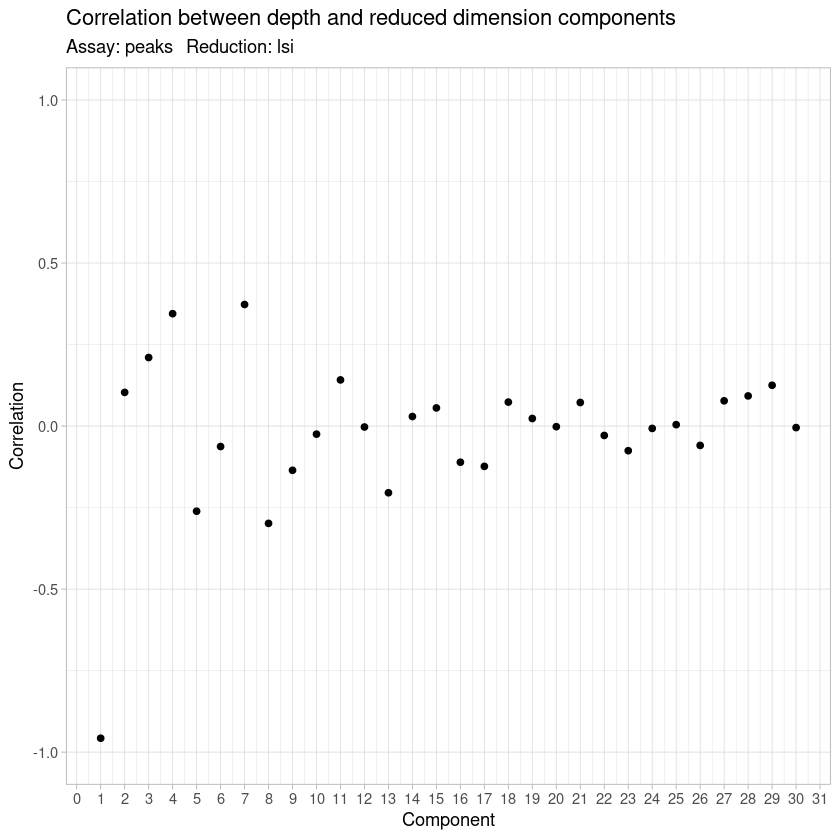

In [145]:
sob <- RunTFIDF(sob)
sob <- FindTopFeatures(sob, min.cutoff = 'q0')
sob <- RunSVD(sob)
DepthCor(sob, n=30)

16:48:31 UMAP embedding parameters a = 0.9922 b = 1.112

16:48:31 Read 80 rows and found 29 numeric columns

16:48:31 Using Annoy for neighbor search, n_neighbors = 30

16:48:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:48:31 Writing NN index file to temp file /tmp/RtmpoKT0U9/file847a6534a03f

16:48:31 Searching Annoy index using 1 thread, search_k = 3000

16:48:31 Annoy recall = 100%

16:48:32 Commencing smooth kNN distance calibration using 1 thread

16:48:34 Initializing from normalized Laplacian + noise

16:48:34 Commencing optimization for 500 epochs, with 2534 positive edges

16:48:36 Optimization finished

Computing nearest neighbor graph

Computing SNN



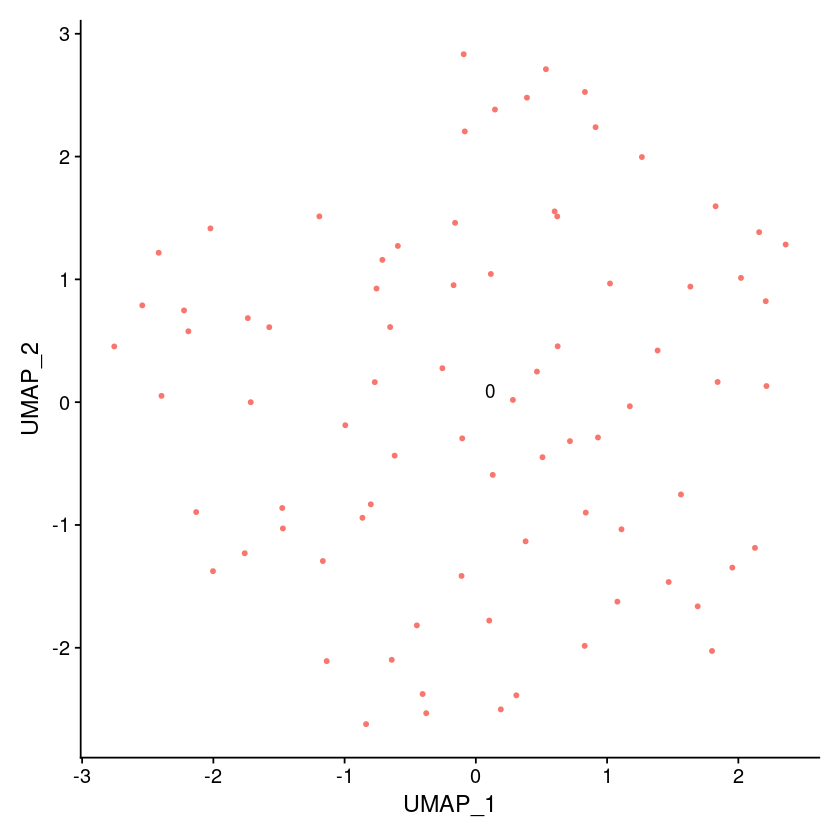

In [146]:
sob <- RunUMAP(object = sob, reduction = 'lsi', dims = 2:30)
sob <- FindNeighbors(object = sob, reduction = 'lsi', dims = 2:30)
sob <- FindClusters(object = sob, verbose = FALSE, algorithm = 3)
DimPlot(object = sob, label = TRUE) + NoLegend()

In [147]:
path_lsi = paste("/home/naoto/scOpen/simulation1/", version, "/easiest", matrix ,"_lsi.tsv", sep="")
path_lsi

[1] "/home/naoto/scOpen/simulation1/v1/easiestM_lsi.tsv"

In [148]:
write.table(sob@reductions$lsi@cell.embeddings, file=path_lsi, sep="\t")

In [16]:
str(sob)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ peaks:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:2660] 0 4 6 8 10 17 18 30 33 38 ...
  .. .. .. .. .. ..@ p       : int [1:81] 0 38 76 114 152 190 228 266 304 342 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 100 80
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:100] "peak1" "peak2" "peak3" "peak4" ...
  .. .. .. .. .. .. ..$ : chr [1:80] "cell1" "cell2" "cell3" "cell4" ...
  .. .. .. .. .. ..@ x       : num [1:2660] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:2660] 0 4 6 8 10 17 18 30 33 38 ...
  .. .. .. .. .. ..@ p       : int [1:81] 0 38 76 114 152 190 228 266 304 342 ...
  .. .. .. .. .. ..@ Di

In [18]:
count.sim.bin.noise = read.table("/home/naoto/scOpen/easiestX.tsv", sep="\t")

In [24]:
count.sim.bin.noise

,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10,⋯,cell71,cell72,cell73,cell74,cell75,cell76,cell77,cell78,cell79,cell80
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
peak1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
peak2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
peak3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
peak4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
peak5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
peak6,1,1,0,0,1,1,1,0,1,0,⋯,0,0,1,1,1,1,1,0,0,0
peak7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
peak8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
peak9,1,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [19]:
colnames(count.sim.bin.noise) = paste0("cell", 1:ncol(count.sim.bin.noise))
rownames(count.sim.bin.noise) = paste0("peak", 1:nrow(count.sim.bin.noise))
sob = CreateSeuratObject(
    counts = count.sim.bin.noise,
    assay = "peaks"
)

In [23]:
sob

An object of class Seurat 
100 features across 80 samples within 1 assay 
Active assay: peaks (100 features, 100 variable features)
 2 dimensional reductions calculated: lsi, umap

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work):
"You're computing too large a percentage of total singular values, use a standard svd instead."
Scaling cell embeddings



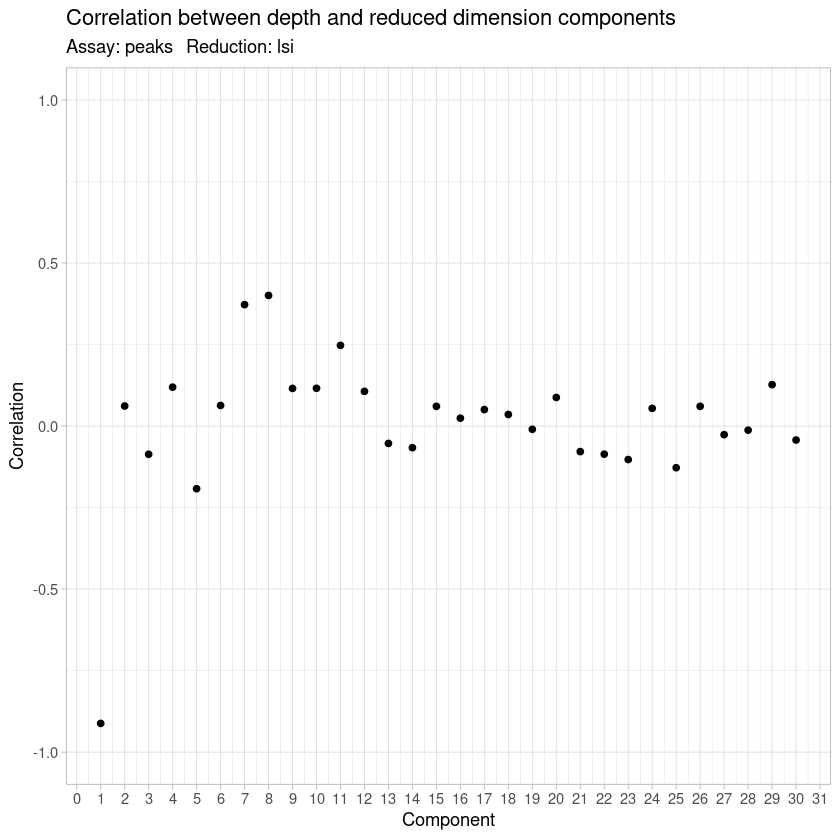

In [20]:
sob <- RunTFIDF(sob)
sob <- FindTopFeatures(sob, min.cutoff = 'q0')
sob <- RunSVD(sob)
DepthCor(sob, n=30)

19:10:34 UMAP embedding parameters a = 0.9922 b = 1.112

19:10:34 Read 80 rows and found 29 numeric columns

19:10:34 Using Annoy for neighbor search, n_neighbors = 30

19:10:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

19:10:34 Writing NN index file to temp file /tmp/RtmpGhp4Sn/filea171cc4a451

19:10:34 Searching Annoy index using 1 thread, search_k = 3000

19:10:34 Annoy recall = 100%

19:10:36 Commencing smooth kNN distance calibration using 1 thread

19:10:38 Initializing from normalized Laplacian + noise

19:10:38 Commencing optimization for 500 epochs, with 2472 positive edges

19:10:40 Optimization finished

Computing nearest neighbor graph

Computing SNN



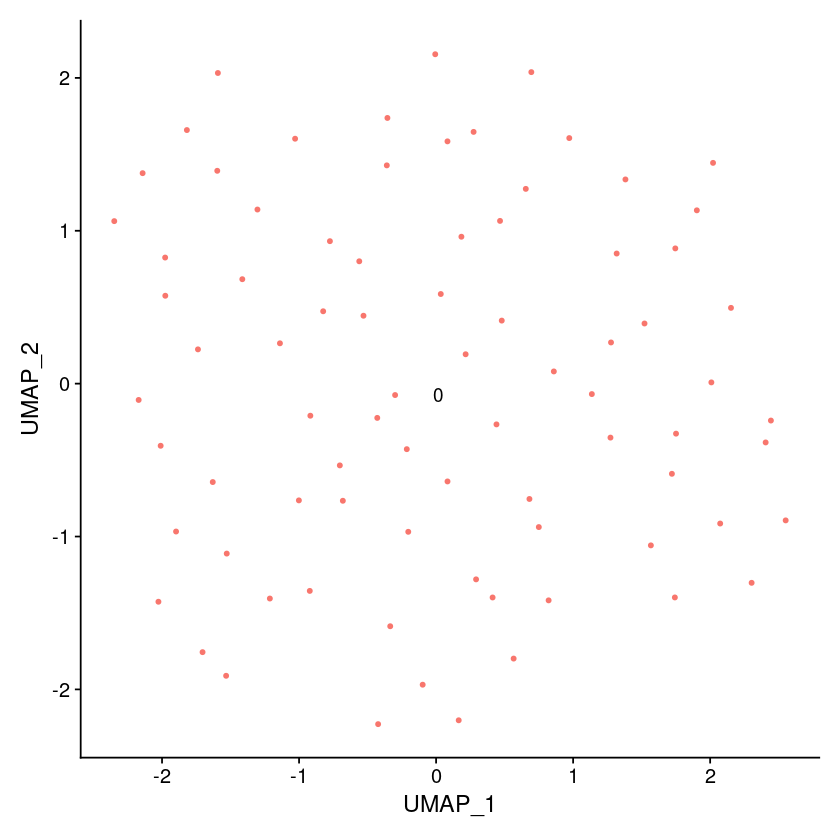

In [22]:
sob <- RunUMAP(object = sob, reduction = 'lsi', dims = 2:30)
sob <- FindNeighbors(object = sob, reduction = 'lsi', dims = 2:30)
sob <- FindClusters(object = sob, verbose = FALSE, algorithm = 3)
DimPlot(object = sob, label = TRUE) + NoLegend()